In [1]:
import numpy as np
import pandas as pd
import re
import pydot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math

import os.path
from os import path

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont


In [2]:
df_train = pd.read_csv('train.csv');
df_test = pd.read_csv('../input/test.csv')
entiredata = [df_train, df_test]
originaltraindata = df_train.copy()
PassengerId  = df_test['PassengerId']
df_train.head()

FileNotFoundError: [Errno 2] File ../input/train.csv does not exist: '../input/train.csv'

In [ ]:
df_train.info()
df_train.describe()

In [ ]:
df_train.describe(include=['O'])

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

In [ ]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

In [ ]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=40)

In [ ]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=3, aspect=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=40)
grid.add_legend();

In [ ]:
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived', size=2.5, aspect=2)
grid.map(sns.barplot, 'Sex', 'Fare', ci=None)
grid.add_legend()

In [ ]:
#creating a new feature family and isalone
for data in entiredata:
    data['family'] = data['SibSp'] + data['Parch'] 

for data in entiredata:
    data['isalone'] = 0
    data.loc[data['family'] == 0, 'isalone'] = 1
df_train.head()
    

In [ ]:
# Adding titles
def title(name):
    search_title = re.search(' ([A-Za-z]+)\.', name)
    # etract the title if exists and return
    if search_title:
        return search_title.group(1)
    return ""

for data in entiredata:
    data['Title'] = data['Name'].apply(title)
for data in entiredata:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')


In [ ]:
# mapping titles
for data in entiredata:
    title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)

In [ ]:
#missing details 
missing_train = df_train.isnull().sum()
missing_test = df_test.isnull().sum()
missing_test


In [ ]:
missing_train

In [ ]:
# Removing Nulls from Embarked, fare
for data in entiredata:
    data['Embarked'] = data['Embarked'].fillna(df_train.Embarked.dropna().mode()[0])
for data in entiredata:
    data['Fare'] = data['Fare'].fillna(df_train['Fare'].median())

In [ ]:
# mapping gender female:1 male:0
for data in entiredata:
    data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [ ]:
#Removing nulls from age
pred_ages = np.zeros((2,3))
pred_ages

In [3]:
for data in entiredata:
    for i in range(0, 2):
        for j in range(0, 3):
            pred_df = data[(data['Sex'] == i) & \
                                  (data['Pclass'] == j+1)]['Age'].dropna()
            age_pred = pred_df.median()
            pred_ages[i,j] = int( age_pred/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            data.loc[ (data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j+1),\
                    'Age'] = pred_ages[i,j]

    data['Age'] = data['Age'].astype(int)

df_train.head()

NameError: name 'entiredata' is not defined

In [4]:
# Mapping Age, fare , Embarked
for data in entiredata:
    data.loc[ data['Age'] <= 16, 'Age']    = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age'] = 4
    
    data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[ data['Fare'] > 31, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(int)
    
    data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

NameError: name 'entiredata' is not defined

In [5]:
# Feature Selection : Removing irrelavant features
drop_features = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_train = df_train.drop(drop_features, axis = 1)
df_test = df_test.drop(drop_features, axis = 1)

df_train.head()

NameError: name 'df_train' is not defined

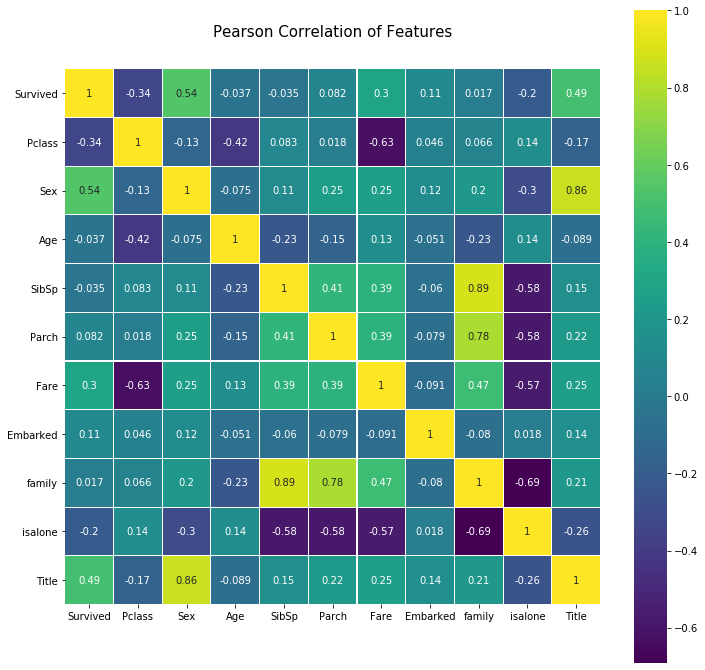

In [566]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
# Euclidean distance

def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)